### 1 Additive Increase and Multiplicative Decrease (AIMD) for TCP

In [19]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
def aimd_plot(C:int, x1:int, x2:int, alpha1:int, alpha2:int, beta1:int=0.5, beta2:int=0.5, output:str='output.svg', title:str='AIMD Algorithm'):
    """
    Plot a graph for AIMD Algorithm

    Args:
        C (int): Maximum capacity. MD will be applied when x1 + x2 reach this capacity.
        x1 (int): Initial allocation value for x1
        x2 (int): Initial allocation value for x2
        alpha1 (int): Addictive Increase factor for x1
        alpha2 (int): Addictive Increase factor for x2
        beta1 (int): Multiplicative Decrease factor for x1
        beta2 (int): Multiplicative Decrease factor for x2
        output (str): Output filename in svg format. For example, 'aimd.svg'
        title (str): Main title of the output chart. For example, 'Bar Chart'
    """

    iterations = 1

    x1_values = np.empty((0,))
    x2_values = np.empty((0,))

    optimal_x = (C - 0) / (1 - -1)
    optimal_y = -1 * optimal_x + C

    # Store initial values
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)

    while (not(round(x1,2) == optimal_x and round(x2,2) == optimal_y)):
        if iterations == 1000:
            break
        # Loop till x1 and x2 reach the optimal point OR till 1000 iterations

        if (x1 + x2 <= C):
            # Yet to reach capacity
            # Addictive Increase

            x1 = x1 + alpha1
            x2 = x2 + alpha1
        else:
            # Reach / Over capacity
            # Multiplicative Decrease

            x1 = x1 * (1 - beta1)
            x2 = x2 * (1 - beta2)

        # Store new values
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)

        iterations += 1

    sendingrate_x1 = sum(x1_values)/iterations
    sendingrate_x2 = sum(x2_values)/iterations
    print('Number of interations to converge: ', iterations)
    print("Final x1:", x1)
    print("Final x2:", x2)

    # Create a line chart
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    plt.style.use("seaborn-v0_8-whitegrid")

    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)

    # Plot Fairness Line where x1 = x2 (Equal distribution)
    fairness_line_x_values = np.linspace(0, C*1.1, C)
    plot1.plot(fairness_line_x_values, fairness_line_x_values, label='Fairness Line', linestyle='dashed', linewidth=1)

    # Plot Efficiency Line where x1 + x2 = C
    efficiency_line_x_values = np.linspace(0, C, C)
    efficiency_line_y_values = C - efficiency_line_x_values
    plot1.plot(efficiency_line_x_values, efficiency_line_y_values, label='Efficiency Line', linestyle='dashed', linewidth=1)

    # Plot the Optimal Point (Intersection)
    plot1.plot(optimal_x, optimal_y, marker='o', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Plot AIMD Algorithm
    plot1.plot(x1_values, x2_values, marker='.', color='black', linewidth=1)

    # Plot x1 and x2 convergent value
    plot1.plot(x1_values[-1], x2_values[-1], marker='.', label=f'$x_{1}$ $x_{2}$ Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})')

    # Add title and labels
    # plot1.set_title('AIMD Algorithm')
    plot1.set_xlabel("User 1's Allocation $x_{1}$")
    plot1.set_ylabel("User 2's Allocation $x_{2}$")

    # Set limits for x and y axes
    plot1.set_xlim(0, C*1.1)
    plot1.set_ylim(0, C*1.1)

    # Display grid
    plot1.grid(False)
    plot1.legend(loc='upper left', ncol=2)
    plot1.annotate(f'Capacity: {C}\nIterations: {iterations}\nInitial $x_{1}$: {round(x1_values[0])}\nInitial $x_{2}$: {round(x2_values[0])}\n$\\alpha_{1}$: {alpha1}\n$\\alpha_{2}$: {alpha2}\n$\\beta_{1}$: {beta1}\n$\\beta_{2}$: {beta2}', xy=(0.925*C, C/8))

    # Congestion Window plot for x1
    rtt_values = np.linspace(0, iterations, iterations)
    plot2.plot(rtt_values, x1_values, marker=".", color='black', linewidth=1)
    plot2.set_xlabel('Number of Transmissions (RTTs)')
    plot2.set_ylabel('Congestion Window Size\n(Segments)')
    plot2.set_title('Congestion Window for $x_{1}$')
    plot2.set_xlim(0, iterations*1.1)
    plot2.annotate(f'Sending Rate $x_{1}$: {sendingrate_x1:.2f} segment / RTT', xy=(iterations/2, C/8))
    plot2.grid(False)

    # Congestion Window plot for x2
    plot3.plot(rtt_values, x2_values, marker=".", color='black', linewidth=1)
    plot3.set_xlabel('Number of Transmissions (RTTs)')
    plot3.set_ylabel('Congestion Window Size\n(Segments)')
    plot3.set_title('Congestion Window for $x_{2}$')
    plot3.set_xlim(0, iterations*1.1)
    plot3.annotate(f'Sending Rate $x_{2}$: {sendingrate_x2:.2f} segment / RTT', xy=(iterations/2, C/1.8))
    plot3.grid(False)

    fig.suptitle(title)

    # Show the plot
    plt.savefig(output)
    plt.show()

Number of interations to converge:  159
Final x1: 24.9951171875
Final x2: 25.0048828125


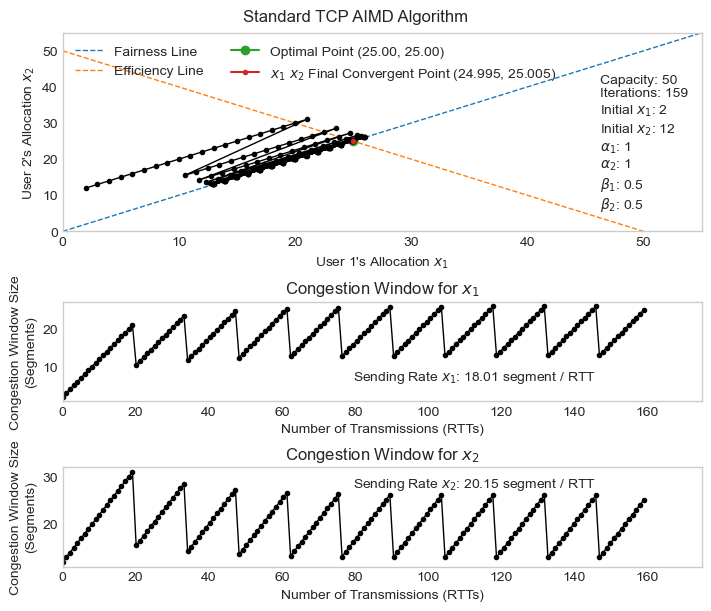

In [20]:
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%Y-%m-%d_%H-%M-%S")

aimd_plot(C=50,
          x1=2,
          x2=12,
          alpha1=1,
          alpha2=1,
          beta1=0.5,
          beta2=0.5,
          output=f"aimd_{formatted_time}.svg",
          title="Standard TCP AIMD Algorithm"
          )


### 2. Multiplicative Increase and Multiplicative Decrease (MIMD) for TCP

In [21]:
def mimd_plot(C:int, x1:int, x2:int, alpha1:int, alpha2:int, beta1:int=0.5, beta2:int=0.5, output:str='output.svg', title:str='AIMD Algorithm'):
    """
    Plot a graph for MIMD Algorithm

    Args:
        C (int): Maximum capacity. MD will be applied when x1 + x2 reach this capacity.
        x1 (int): Initial allocation value for x1
        x2 (int): Initial allocation value for x2
        alpha1 (int): Multiplicative Increase factor for x1
        alpha2 (int): Multiplicative Increase factor for x2
        beta1 (int): Multiplicative Decrease factor for x1
        beta2 (int): Multiplicative Decrease factor for x2
        output (str): Output filename in svg format. For example, 'mimd.svg'
        title (str): Main title of the output chart. For example, 'Bar Chart'
    """

    iterations = 1

    x1_values = np.empty((0,))
    x2_values = np.empty((0,))

    optimal_x = (C - 0) / (1 - -1)
    optimal_y = -1 * optimal_x + C

    # Store initial values
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)

    while (not(round(x1,2) == optimal_x and round(x2,2) == optimal_y)):
        if iterations == 1000:
            break
        # Loop till x1 and x2 reach the optimal point OR till 1000 iterations

        if (x1 + x2 <= C):
            # Yet to reach capacity
            # Multiplicative Increase
            x1 = x1 + (alpha1 * x1)
            x2 = x2 + (alpha2 * x1)
        else:
            # Reach / Over capacity
            # Multiplicative Decrease
            x1 = x1 * (1 - beta1)
            x2 = x2 * (1 - beta2)

        # Store new values
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)

        iterations += 1

    sendingrate_x1 = sum(x1_values)/iterations
    sendingrate_x2 = sum(x2_values)/iterations
    print('Number of interations to converge: ', iterations)
    print("Final x1:", x1)
    print("Final x2:", x2)

    # Create a line chart
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    plt.style.use("seaborn-v0_8-whitegrid")

    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)

    # Plot Fairness Line where x1 = x2 (Equal distribution)
    fairness_line_x_values = np.linspace(0, C*1.1, C)
    plot1.plot(fairness_line_x_values, fairness_line_x_values, label='Fairness Line', linestyle='dashed', linewidth=1)

    # Plot Efficiency Line where x1 + x2 = C
    efficiency_line_x_values = np.linspace(0, C, C)
    efficiency_line_y_values = C - efficiency_line_x_values
    plot1.plot(efficiency_line_x_values, efficiency_line_y_values, label='Efficiency Line', linestyle='dashed', linewidth=1)

    # Plot the Optimal Point (Intersection)
    plot1.plot(optimal_x, optimal_y, marker='o', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Plot AIMD Algorithm
    plot1.plot(x1_values, x2_values, marker='.', color='black', linewidth=1)

    # Plot x1 and x2 convergent value
    plot1.plot(x1_values[-1], x2_values[-1], marker='.', label=f'$x_{1}$ $x_{2}$ Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})')

    # Add title and labels
    # plot1.set_title('AIMD Algorithm')
    plot1.set_xlabel("User 1's Allocation $x_{1}$")
    plot1.set_ylabel("User 2's Allocation $x_{2}$")

    # Set limits for x and y axes
    plot1.set_xlim(0, C*1.1)
    plot1.set_ylim(0, C*1.1)

    # Display grid
    plot1.grid(False)
    plot1.legend(loc='upper left', ncol=2)
    plot1.annotate(f'Capacity: {C}\nIterations: {iterations}\nInitial $x_{1}$: {round(x1_values[0])}\nInitial $x_{2}$: {round(x2_values[0])}\n$\\alpha_{1}$: {alpha1}\n$\\alpha_{2}$: {alpha2}\n$\\beta_{1}$: {beta1}\n$\\beta_{2}$: {beta2}', xy=(0.925*C, C/8))

    # Congestion Window plot for x1
    rtt_values = np.linspace(0, iterations, iterations)
    plot2.plot(rtt_values, x1_values, marker=".", color='black', linewidth=1)
    plot2.set_xlabel('Number of Transmissions (RTTs)')
    plot2.set_ylabel('Congestion Window Size\n(Segments)')
    plot2.set_title('Congestion Window for $x_{1}$')
    plot2.set_xlim(0, iterations*1.1)
    plot2.annotate(f'Sending Rate $x_{1}$: {sendingrate_x1:.2f} segment / RTT', xy=(iterations/2, C/8))
    plot2.grid(False)

    # Congestion Window plot for x2
    plot3.plot(rtt_values, x2_values, marker=".", color='black', linewidth=1)
    plot3.set_xlabel('Number of Transmissions (RTTs)')
    plot3.set_ylabel('Congestion Window Size\n(Segments)')
    plot3.set_title('Congestion Window for $x_{2}$')
    plot3.set_xlim(0, iterations*1.1)
    plot3.annotate(f'Sending Rate $x_{2}$: {sendingrate_x2:.2f} segment / RTT', xy=(iterations/2, C/4))
    plot3.grid(False)

    fig.suptitle(title)

    # Show the plot
    plt.savefig(output)
    plt.show()

Number of interations to converge:  1000
Final x1: 25.208468039825917
Final x2: 27.72931484380851


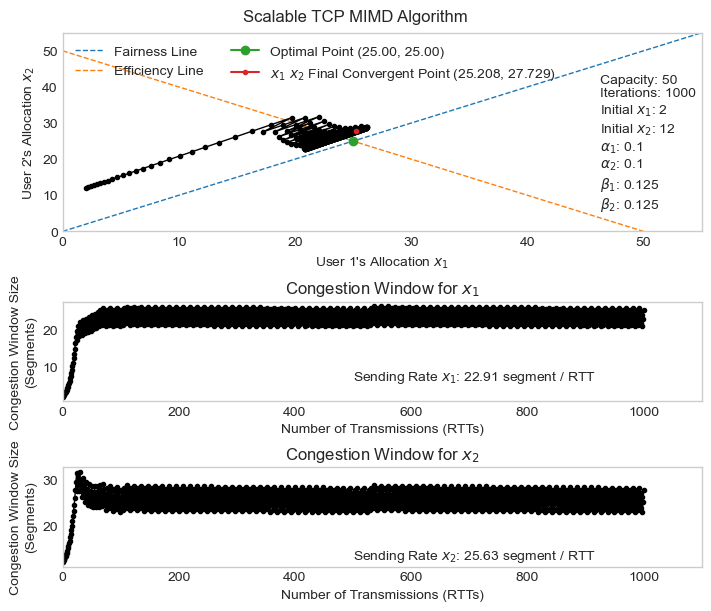

In [22]:
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%Y-%m-%d_%H-%M-%S")

mimd_plot(C=50,
          x1=2,
          x2=12,
          alpha1=0.1,
          alpha2=0.1,
          beta1=0.125,
          beta2=0.125,
          output=f"mimd_{formatted_time}.svg",
          title="Scalable TCP MIMD Algorithm"
          )


### 3. Is the AIMD tuning novel and scalable for high-speed networking in data centre?

Number of interations to converge:  1000
Final x1: 31.333333333333318
Final x2: 18.0


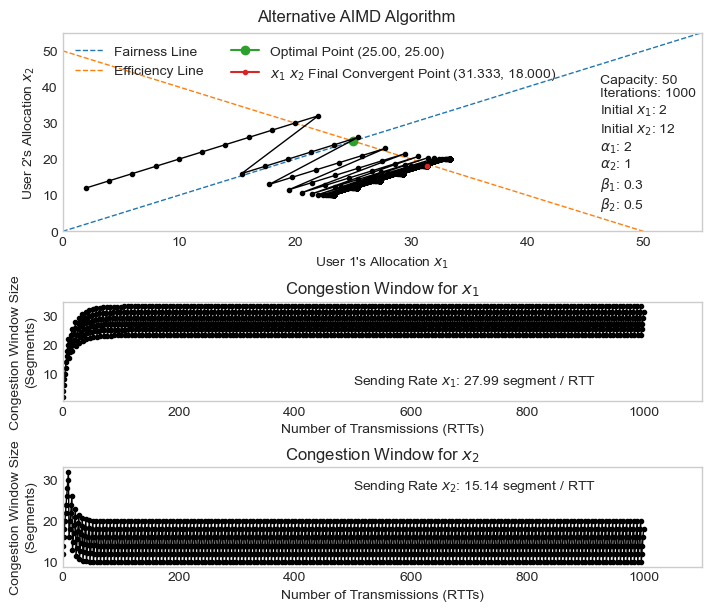

In [26]:
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%Y-%m-%d_%H-%M-%S")

aimd_plot(C=50,
          x1=2,
          x2=12,
          alpha1=2,
          alpha2=1,
          beta1=0.3,
          beta2=0.5,
          output=f"aimd_{formatted_time}.svg",
          title="Alternative AIMD Algorithm"
          )


### 5. Perron-Frobenius Theory Approach to AIMD

In [23]:
import numpy as np

# Define the positive matrix A
betas = np.array([[0.5, 0.5, 0.5]])
alphas = np.array([[1],
                   [1],
                   [1]])
one_minus_betas = 1 - betas

window_sizes = np.array([[2],
                         [5],
                         [12]])

A = np.array([[betas[0][0], 0, 0],
              [0, betas[0][1], 0],
              [0, 0, betas[0][2]]]) + ( 1/np.sum(alphas) * ( np.dot(alphas, one_minus_betas) ))


for i in range(10):
    window_sizes = np.dot(A, window_sizes)
    print(window_sizes)


[[4.16666667]
 [5.66666667]
 [9.16666667]]
[[5.25]
 [6.  ]
 [7.75]]
[[5.79166667]
 [6.16666667]
 [7.04166667]]
[[6.0625]
 [6.25  ]
 [6.6875]]
[[6.19791667]
 [6.29166667]
 [6.51041667]]
[[6.265625]
 [6.3125  ]
 [6.421875]]
[[6.29947917]
 [6.32291667]
 [6.37760417]]
[[6.31640625]
 [6.328125  ]
 [6.35546875]]
[[6.32486979]
 [6.33072917]
 [6.34440104]]
[[6.32910156]
 [6.33203125]
 [6.33886719]]


In [24]:
import numpy as np

def perron_frobenius_right_eigenvector(matrix):
    """
    Calculate the Perron-Frobenius right eigenvector of a non-negative square matrix.

    Parameters:
    matrix (numpy.ndarray): Non-negative square matrix.

    Returns:
    numpy.ndarray: Perron-Frobenius right eigenvector.
    """
    # Ensure matrix is non-negative and square
    assert np.all(matrix >= 0), "Matrix must be non-negative"
    assert matrix.shape[0] == matrix.shape[1], "Matrix must be square"

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Find the index of the eigenvalue with the maximum real part
    max_eigenvalue_index = np.argmax(np.real(eigenvalues))

    # Extract the corresponding eigenvector
    perron_frobenius_eigenvector = np.real(eigenvectors[:, max_eigenvalue_index])

    # Normalize the eigenvector
    perron_frobenius_eigenvector /= np.sum(perron_frobenius_eigenvector)

    return perron_frobenius_eigenvector


perron_frobenius_eigenvector = perron_frobenius_right_eigenvector(A)
print("Perron-Frobenius right eigenvector:", perron_frobenius_eigenvector)


Perron-Frobenius right eigenvector: [0.33333333 0.33333333 0.33333333]


In [25]:
import numpy as np

def perron_frobenius(matrix, tol=1e-6, max_iter=1000):
    """
    Calculate the Perron-Frobenius eigenvalue and eigenvector of a non-negative square matrix.

    Parameters:
    matrix (numpy.ndarray): Non-negative square matrix.
    tol (float): Tolerance for convergence.
    max_iter (int): Maximum number of iterations for power iteration method.

    Returns:
    tuple: Perron-Frobenius eigenvalue and eigenvector.
    """
    # Ensure matrix is non-negative and square
    assert np.all(matrix >= 0), "Matrix must be non-negative"
    assert matrix.shape[0] == matrix.shape[1], "Matrix must be square"

    # Initialize a random non-negative initial vector
    n = len(matrix)
    v = np.random.rand(n)
    v /= np.sum(v)

    # Power iteration method
    prev_eigenvalue = 0
    for _ in range(max_iter):
        Av = np.dot(matrix, v)
        eigenvalue = np.dot(v, Av)
        v = Av / np.linalg.norm(Av, ord=np.inf)  # Normalize the vector
        if np.abs(eigenvalue - prev_eigenvalue) < tol:
            break
        prev_eigenvalue = eigenvalue

    # Normalize the eigenvector
    perron_frobenius_eigenvector = v / np.sum(v)

    return eigenvalue, perron_frobenius_eigenvector


perron_frobenius_eigenvalue, perron_frobenius_eigenvector = perron_frobenius(A)
print("Perron-Frobenius eigenvalue:", perron_frobenius_eigenvalue)
print("Perron-Frobenius eigenvector:", perron_frobenius_eigenvector)


Perron-Frobenius eigenvalue: 2.999999036705722
Perron-Frobenius eigenvector: [0.33333335 0.33333329 0.33333336]
